In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

print(os.cpu_count())

20


In [16]:
!pip install --no-index --find-links /Escritorio/Proyecto final/input/pytorchtabnet/pytorch_tabnet-4.1.0-py3-none-any.whl pytorch-tabnet


Looking in links: /Escritorio/Proyecto
Processing ./final/input/pytorchtabnet/pytorch_tabnet-4.1.0-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No existe el archivo o el directorio: '/home/alumno/Escritorio/Proyecto final/final/input/pytorchtabnet/pytorch_tabnet-4.1.0-py3-none-any.whl'



In [17]:
base_path = './predict-energy-behavior-of-prosumers/'
train = pd.read_csv(base_path + 'train.csv')
gas_prices = pd.read_csv(base_path + 'gas_prices.csv')
client = pd.read_csv(base_path + 'client.csv')
electricity_prices = pd.read_csv(base_path + 'electricity_prices.csv')
forecast_weather = pd.read_csv(base_path + 'forecast_weather.csv')
historical_weather = pd.read_csv(base_path + 'historical_weather.csv')
county_mapping = pd.read_csv(base_path + 'weather_station_to_county_mapping.csv')


In [18]:
client.count()

product_type          41919
county                41919
eic_count             41919
installed_capacity    41919
is_business           41919
date                  41919
data_block_id         41919
dtype: int64

In [19]:
client['eic_count'].nunique()

484

In [20]:
client['eic_count'].value_counts()

14      1787
8       1576
12      1277
9       1256
15      1254
        ... 
454        1
170        1
1270       1
1087       1
1507       1
Name: eic_count, Length: 484, dtype: int64

In [21]:
train.head(8)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
5,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
6,0,1,0,0.000,0,2021-09-01 00:00:00,0,6,3
7,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3


In [22]:
with open(base_path + 'county_id_to_name_map.json') as f:
    county_codes = json.load(f)
pd.DataFrame(county_codes, index=[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,HARJUMAA,HIIUMAA,IDA-VIRUMAA,JÄRVAMAA,JÕGEVAMAA,LÄÄNE-VIRUMAA,LÄÄNEMAA,PÄRNUMAA,PÕLVAMAA,RAPLAMAA,SAAREMAA,TARTUMAA,UNKNOWN,VALGAMAA,VILJANDIMAA,VÕRUMAA


In [23]:
forecast_weather

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 00:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 00:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 00:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 00:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 00:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-30 00:00:00+00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3424508,59.7,26.7,2023-05-30 00:00:00+00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3424509,59.7,27.2,2023-05-30 00:00:00+00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3424510,59.7,27.7,2023-05-30 00:00:00+00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0


In [24]:
client

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


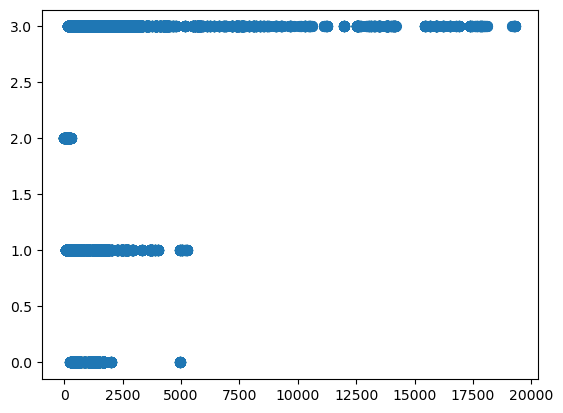

In [11]:
installed_capacity = client['installed_capacity']
product_type = client['product_type']
# plot
fig, ax = plt.subplots()

ax.scatter(installed_capacity, product_type, linewidth=2.0)
plt.show()

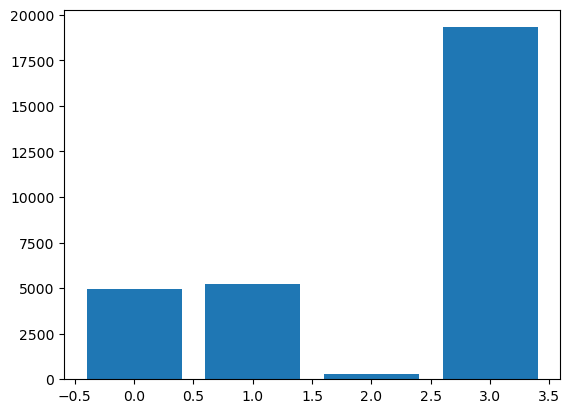

In [12]:
installed_capacity = client['installed_capacity']
product_type = client['product_type']
# plot
fig, ax = plt.subplots()

ax.bar(product_type, installed_capacity)
plt.show()

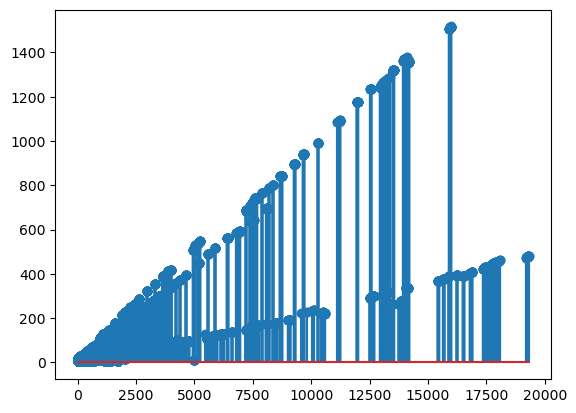

In [13]:
eic_count = client['eic_count']

# plot
fig, ax = plt.subplots()

ax.stem(installed_capacity, eic_count)
plt.show()

train

# I. Consumption Amount Analysis 

In [25]:
enefit = pd.read_csv("./predict-energy-behavior-of-prosumers/train.csv")
enefit["datetime"] = pd.to_datetime(enefit["datetime"])

consumption = enefit[enefit["is_consumption"]==1]
monthlyCons = consumption.groupby(pd.Grouper(key="datetime", freq='M')).mean() 
weeklyCons = consumption.groupby(pd.Grouper(key="datetime", freq='W')).mean() 
dailyCons = consumption.groupby(pd.Grouper(key="datetime", freq='D')).mean() 
meanConsumption = consumption.target.mean()

production = enefit[enefit["is_consumption"]==0]
monthlyProd = production.groupby(pd.Grouper(key="datetime", freq='M')).mean() 
weeklyProd = production.groupby(pd.Grouper(key="datetime", freq='W')).mean() 
dailyProd = production.groupby(pd.Grouper(key="datetime", freq='D')).mean() 
meanProduction = production.target.mean()


In [30]:
import plotly.express as px

fig = px.area(dailyCons,x=dailyCons.index,y="target",
              title='1. Daily Consumption Analysis')
fig.add_hline(y=meanConsumption, line_dash="dot",
              annotation_text="Average Consumption",
              annotation_position="bottom right")
fig.update_traces(line_color='#4ce0b4')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Consumption")
fig.show()

In [31]:
fig = px.area(dailyProd,x=dailyProd.index,y="target",
              title='2. Daily Production Analysis')
fig.add_hline(y=meanProduction, line_dash="dot",
              annotation_text="Average Production",
              annotation_position="bottom right")
fig.update_traces(line_color='#1737d4')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Production")
fig.show()

In [32]:
fig = px.area(dailyCons["target"]-dailyProd["target"],
              x=dailyProd.index,y="target",
              title='3. Daily Net Consumption (Consumption-Production) Analysis')
fig.add_hline(y=(dailyCons["target"]-dailyProd["target"]).mean(),
              line_dash="dot", annotation_text="Average Net Consumption",
              annotation_position="bottom right")
fig.update_traces(line_color='#5f3af2')
fig.update_layout(xaxis_title="Date", yaxis_title="Net Consumption")
fig.show()

# II. Gas Price Analysis 

In [33]:
gas = pd.read_csv("./predict-energy-behavior-of-prosumers/gas_prices.csv")
gas.drop(["origin_date"],inplace=True,axis=1)
gas["forecast_date"] = pd.to_datetime(gas["forecast_date"])

monthly = gas.groupby(pd.Grouper(key="forecast_date", freq='M')).mean() 
weekly = gas.groupby(pd.Grouper(key="forecast_date", freq='W')).mean() 
daily = gas.groupby(pd.Grouper(key="forecast_date", freq='D')).mean() 
meanGasLow = gas.lowest_price_per_mwh.mean()
meanGasHigh = gas.highest_price_per_mwh.mean()

In [34]:
fig = px.area(daily, x=daily.index, y=["lowest_price_per_mwh","highest_price_per_mwh"],
              title='4. Daily Price/MWh Analysis',
              color_discrete_map={"lowest_price_per_mwh": "#EFB74F",
                                  "highest_price_per_mwh": "#247881"})
fig.add_hline(y=meanGasLow, line_dash="dot",
              annotation_text="Average Low Price/MWh", annotation_position="top right")
fig.add_hline(y=meanGasHigh, line_dash="dot",
              annotation_text="Average High Price/MWh", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Euros/MWh",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

In [35]:
fig = px.area(weekly, x=weekly.index, y=["lowest_price_per_mwh","highest_price_per_mwh"],
              title='5. Weekly Price/MWh Analysis',
              color_discrete_map={"lowest_price_per_mwh": "#6499E9",
                                  "highest_price_per_mwh": "#6930C3"})
fig.add_hline(y=meanGasLow, line_dash="dot",
              annotation_text="Average Low Price/MWh", annotation_position="top right")
fig.add_hline(y=meanGasHigh, line_dash="dot",
              annotation_text="Average High Price/MWh", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Euros/MWh",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()


# III. Historical Weather Analysis 

In [48]:
weather = pd.read_csv("./predict-energy-behavior-of-prosumers/historical_weather.csv")
weather["datetime"] = pd.to_datetime(weather["datetime"])

monthly = weather.groupby(pd.Grouper(key="datetime", freq='M')).mean() 
weekly = weather.groupby(pd.Grouper(key="datetime", freq='W')).mean() 
daily = weather.groupby(pd.Grouper(key="datetime", freq='D')).mean() 
meanTemp = weather.temperature.mean()
meanSolar = weather.direct_solar_radiation.mean()
meanRain = weather.rain.mean()
meanSnow = weather.snowfall.mean()
meanWindspeed = weather.windspeed_10m.mean()
meanSurfacePressure = weather.surface_pressure.mean()
meancloudcover = weather.cloudcover_total.mean()

In [37]:
weather.head(5)

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
3,2021-09-01,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1
4,2021-09-01,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1


In [49]:
fig = px.area(daily, x=daily.index, y="cloudcover_total",
              title='6. Daily Historical Cloud cover')
fig.add_hline(y= meancloudcover, line_dash="dot",
              annotation_text="Average Cloud Cover", annotation_position="bottom right")
fig.update_traces(line_color='#4ce0b4')
fig.update_layout(xaxis_title="Date", yaxis_title="Cloud Cover",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

In [52]:
fig = px.area(weekly, x=weekly.index, y="cloudcover_total",
              title='6. Weekly Historical Cloud cover')
fig.add_hline(y= meancloudcover, line_dash="dot",
              annotation_text="Average Cloud Cover", annotation_position="bottom right")
fig.update_traces(line_color='#4ce0b4')
fig.update_layout(xaxis_title="Date", yaxis_title="Cloud Cover",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

In [39]:
fig = px.area(daily, x=daily.index, y="temperature",
              title='6. Daily Historical Temperature Analysis')
fig.add_hline(y=meanTemp, line_dash="dot",
              annotation_text="Average Temperature", annotation_position="bottom right")
fig.update_traces(line_color='#4ce0b4')
fig.update_layout(xaxis_title="Date", yaxis_title="Temperature",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

In [40]:
fig = px.area(daily, x=daily.index, y=["direct_solar_radiation","shortwave_radiation"],
              title='7. Daily Radiation Analysis',
              color_discrete_map={"shortwave_radiation": "#6499E9",
                                  "direct_solar_radiation": "#C70A80"})
fig.add_hline(y=meanSolar, line_dash="dot",
              annotation_text="Average Solar Radiation", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Radiation Level",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

In [41]:
fig = px.area(weekly, x=weekly.index, y=["direct_solar_radiation","shortwave_radiation"],
              title='8. Weekly Radiation Analysis',
              color_discrete_map={"shortwave_radiation": "#6499E9",
                                  "direct_solar_radiation": "#C70A80"},
              line_shape='spline')
fig.add_hline(y=meanSolar, line_dash="dot",
              annotation_text="Average Solar Radiation", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Radiation Level",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()



In [43]:


fig = px.area(weekly, x=weekly.index, y=["rain","snowfall"],
              title='9. Weekly Rain\Snowfall Analysis',
              color_discrete_map={"rain": "#1d06cc",
                                  "snowfall": "#565D47"},
              line_shape='spline')
fig.add_hline(y=meanRain, line_dash="dot",
              annotation_text="Average Rainfall", annotation_position="bottom right")
fig.add_hline(y=meanSnow, line_dash="dot",
              annotation_text="Average Snowfall", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Rain/Snow Level",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()



In [44]:
fig = px.area(daily, x=daily.index, y=["windspeed_10m"],
              title='10. Daily Windspeed Analysis',
              color_discrete_map={"windspeed_10m": "#69C98D"},
              line_shape='spline')
fig.add_hline(y=meanWindspeed, line_dash="dot",
              annotation_text="Average Windspeed", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Windspeed (in m/s)",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()



In [45]:
fig = px.area(weekly, x=weekly.index, y=["windspeed_10m"],
              title='11. Weekly Windspeed Analysis',
              color_discrete_map={"windspeed_10m": "#1640D6"},
              line_shape='spline')
fig.add_hline(y=meanWindspeed, line_dash="dot",
              annotation_text="Average Windspeed", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Windspeed (in m/s)",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()


In [46]:
fig = px.area(daily, x=daily.index, y=["surface_pressure"],
              title='12. Daily Surface Pressure Analysis',
              color_discrete_map={"surface_pressure": "#D61640"},
              line_shape='spline')
fig.add_hline(y=meanSurfacePressure, line_dash="dot",
              annotation_text="Average Surface Pressure", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Pressure (in Hectopascals)",yaxis_range=[900,1100],
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()


In [47]:
fig = px.area(weekly, x=weekly.index, y=["surface_pressure"],
              title='13. Weekly Surface Pressure Analysis',
              color_discrete_map={"surface_pressure": "#26A620"},
              line_shape='spline')
fig.add_hline(y=meanSurfacePressure, line_dash="dot",
              annotation_text="Average Surface Pressure", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Pressure (in Hectopascals)",yaxis_range=[900,1100],
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()



# LSTM 

In [32]:
df = train[['product_type','target', 'is_consumption', 'datetime']]
df

,product_type,target,is_consumption,datetime
0,1,0.713,0,2021-09-01 00:00:00
1,1,96.590,1,2021-09-01 00:00:00
2,2,0.000,0,2021-09-01 00:00:00
3,2,17.314,1,2021-09-01 00:00:00
4,3,2.904,0,2021-09-01 00:00:00
...,...,...,...,...
2018347,0,197.233,1,2023-05-31 23:00:00
2018348,1,0.000,0,2023-05-31 23:00:00
2018349,1,28.404,1,2023-05-31 23:00:00
2018350,3,0.000,0,2023-05-31 23:00:00


In [33]:
consumption_df = df[df['is_consumption'] == 1]
consumption_df

,product_type,target,is_consumption,datetime
1,1,96.590,1,2021-09-01 00:00:00
3,2,17.314,1,2021-09-01 00:00:00
5,3,656.859,1,2021-09-01 00:00:00
7,0,59.000,1,2021-09-01 00:00:00
9,1,501.760,1,2021-09-01 00:00:00
...,...,...,...,...
2018343,1,42.401,1,2023-05-31 23:00:00
2018345,3,117.332,1,2023-05-31 23:00:00
2018347,0,197.233,1,2023-05-31 23:00:00
2018349,1,28.404,1,2023-05-31 23:00:00


In [34]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009176 entries, 1 to 2018351
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   product_type    1009176 non-null  int64  
 1   target          1008912 non-null  float64
 2   is_consumption  1009176 non-null  int64  
 3   datetime        1009176 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 38.5+ MB


In [35]:
consumption_df['datetime'] = pd.to_datetime(consumption_df['datetime'], format='%Y-%m-%d %H:%M:%S')

/tmp/ipykernel_4992/3374952313.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009176 entries, 1 to 2018351
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   product_type    1009176 non-null  int64         
 1   target          1008912 non-null  float64       
 2   is_consumption  1009176 non-null  int64         
 3   datetime        1009176 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 38.5 MB


In [37]:
consumption_df

,product_type,target,is_consumption,datetime
1,1,96.590,1,2021-09-01 00:00:00
3,2,17.314,1,2021-09-01 00:00:00
5,3,656.859,1,2021-09-01 00:00:00
7,0,59.000,1,2021-09-01 00:00:00
9,1,501.760,1,2021-09-01 00:00:00
...,...,...,...,...
2018343,1,42.401,1,2023-05-31 23:00:00
2018345,3,117.332,1,2023-05-31 23:00:00
2018347,0,197.233,1,2023-05-31 23:00:00
2018349,1,28.404,1,2023-05-31 23:00:00


In [38]:
consumption_df = consumption_df.set_index("datetime")

In [39]:
consumption_df.shape

(1009176, 3)

In [40]:
consumption_df['target'].dropna(inplace = True) #Elimina las filas con valores vacios
consumption_df.shape

(1009176, 3)

In [41]:
y = consumption_df['target']
y.shape

(1009176,)

In [42]:
# Normalizar la data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)) 
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizar la data previo al FIT")
print(y[:10])

Normalizar la data previo al FIT
[[6.23955364e-03]
 [1.11845566e-03]
 [4.24320009e-02]
 [3.81130205e-03]
 [3.24128630e-02]
 [3.33008059e-01]
 [1.78033024e-04]
 [1.47549068e-03]
 [1.98820770e-03]
 [1.51444348e-03]]


In [43]:
#Dividimos la Y
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
train_data , test_data  = y[0:training_size-test_size ,:] ,y[training_size:len(y),:1]

In [44]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []

    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)

time_step = 10

X_train, y_train = create_dataset(consumption_df.values, time_step)
X_test, y_test = create_dataset(test_data, time_step)  # Assuming test_data is a NumPy array

In [45]:
# reshape train and input-output pairs

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)


print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)



X_train shape:  (1009165, 10, 1)
X_test shape:  (201825, 10, 1)


In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

tf.keras.backend.clear_session()

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 10, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 10, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 10, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 10))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1,activation='linear'))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
     

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 10)            840       
                                                                 
 lstm_2 (LSTM)               (None, 10, 10)            840       
                                                                 
 lstm_3 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 3011 (11.76 KB)
Trainable params: 3011 (11

In [52]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
10092/10092 [==============================] - 193s 19ms/step - loss: 0.3522
Epoch 2/10
10092/10092 [==============================] - 188s 19ms/step - loss: 0.1145
Epoch 3/10
10092/10092 [==============================] - 187s 19ms/step - loss: 0.0954
Epoch 4/10
10092/10092 [==============================] - 189s 19ms/step - loss: 0.0886
Epoch 5/10
10092/10092 [==============================] - 188s 19ms/step - loss: 0.0853
Epoch 6/10
10092/10092 [==============================] - 189s 19ms/step - loss: 0.0828
Epoch 7/10
10092/10092 [==============================] - 189s 19ms/step - loss: 0.0811
Epoch 8/10
10092/10092 [==============================] - 188s 19ms/step - loss: 0.0799
Epoch 9/10
10092/10092 [==============================] - 189s 19ms/step - loss: 0.0790
Epoch 10/10
10092/10092 [==============================] - 188s 19ms/step - loss: 0.0784


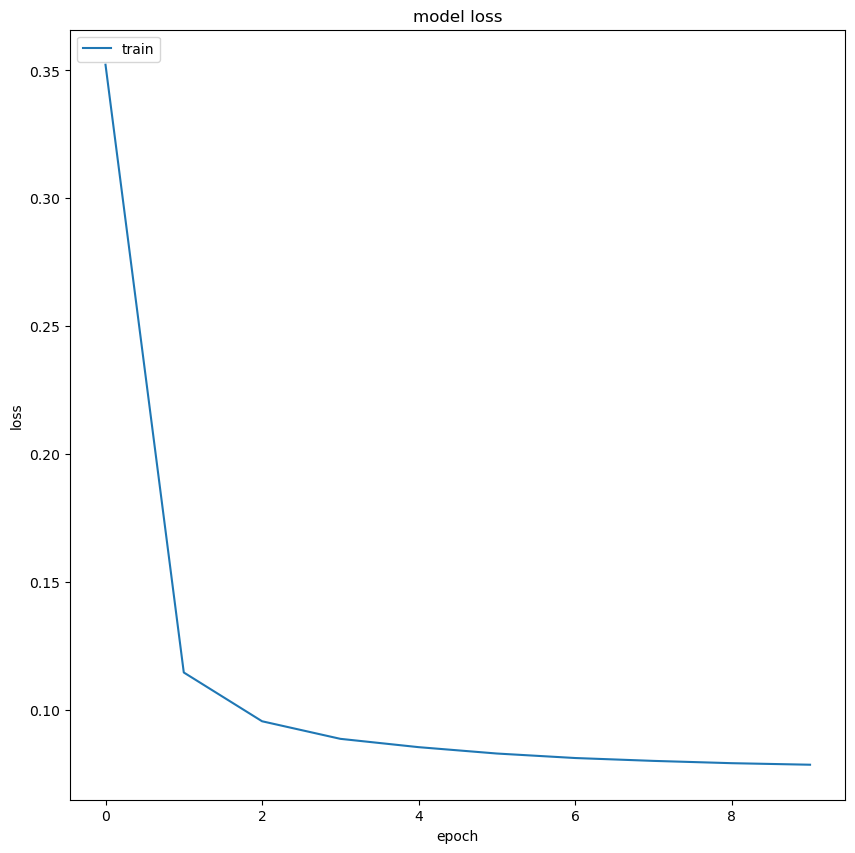

In [54]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

     


In [55]:
#funcionamiento de nuestro modelo
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

6308/6308 [==============================] - 33s 5ms/step


In [56]:
trainPredict.shape

(1009165, 1)

In [58]:
testPredict.shape

(201825, 1)

In [59]:
# una vez hechas las predicciones, tenemos que des-normalizarlas
trainPredict = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([y_test])

In [65]:
trainY_orig.shape

(1, 1009165)

In [66]:
testY_orig.shape

(1, 201825)

In [69]:
y_train_org = trainY_orig.T
y_train_org.shape

(1009165, 1)

In [71]:
y_test_org = testY_orig.T
y_test_org.shape

(201825, 1)

In [82]:
testPredict.shape

(201825, 1)

In [73]:
import math
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# y ahora calculamos el error cometido en train y en test
trainScore = math.sqrt(mean_squared_error(y_train_org[0], trainPredict[0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_org[0], testPredict[0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1089.84 RMSE
Test Score: 16305.72 RMSE


In [92]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
# por como creamos el dataset de entrenamiento, ahora tenemos que desplazar
# nuestras predicciones para que "cuadren" con el eje x de los datos originales
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_step:len(trainPredict)+time_step, :] = trainPredict

In [97]:
# y lo mismo para el test
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_step*2)+1:len(y)-1, :] = testPredict

ValueError: could not broadcast input array from shape (201825,1) into shape (0,1)

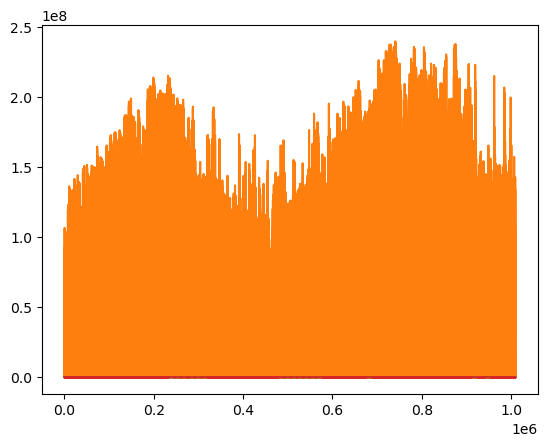

In [94]:
# y mostramos los datos originales, la predicción en training y la predicción en test
plt.plot(scaler.inverse_transform(consumption_df))
plt.plot(trainPredictPlot)
plt.show()

## Intento 2 con TRAIN recurrente

In [98]:
import pandas as pd

df = train

# Agrupa por prediction_unit_id
grouped_data = df.groupby('prediction_unit_id')

# Crea un diccionario para almacenar los datasets separados
datasets_by_prediction_unit = {}

# Itera sobre los grupos y almacena cada grupo en el diccionario
for prediction_unit_id, group in grouped_data:
    datasets_by_prediction_unit[prediction_unit_id] = group

# Ahora, datasets_by_prediction_unit es un diccionario donde cada clave es un prediction_unit_id
# y el valor es el DataFrame correspondiente a ese prediction_unit_id.


In [101]:
dataset_for_prediction_unit_52 = datasets_by_prediction_unit.get(52)
dataset_for_prediction_unit_52

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
104,13,1,3,0.000,0,2021-09-01 00:00:00,0,104,52
105,13,1,3,750.005,1,2021-09-01 00:00:00,0,105,52
226,13,1,3,0.000,0,2021-09-01 01:00:00,0,226,52
227,13,1,3,674.805,1,2021-09-01 01:00:00,0,227,52
348,13,1,3,0.000,0,2021-09-01 02:00:00,0,348,52
...,...,...,...,...,...,...,...,...,...
2018071,13,1,3,193.608,1,2023-05-31 21:00:00,637,2018071,52
2018200,13,1,3,0.580,0,2023-05-31 22:00:00,637,2018200,52
2018201,13,1,3,198.959,1,2023-05-31 22:00:00,637,2018201,52
2018330,13,1,3,0.000,0,2023-05-31 23:00:00,637,2018330,52


In [102]:
dataset_for_prediction_unit_44 = datasets_by_prediction_unit.get(44)
dataset_for_prediction_unit_44

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
88,11,0,2,0.000,0,2021-09-01 00:00:00,0,88,44
89,11,0,2,7.620,1,2021-09-01 00:00:00,0,89,44
210,11,0,2,0.000,0,2021-09-01 01:00:00,0,210,44
211,11,0,2,11.476,1,2021-09-01 01:00:00,0,211,44
332,11,0,2,0.000,0,2021-09-01 02:00:00,0,332,44
...,...,...,...,...,...,...,...,...,...
2005569,11,0,2,1.523,1,2023-05-27 21:00:00,633,2005569,44
2005700,11,0,2,0.000,0,2023-05-27 22:00:00,633,2005700,44
2005701,11,0,2,1.598,1,2023-05-27 22:00:00,633,2005701,44
2005832,11,0,2,0.000,0,2023-05-27 23:00:00,633,2005832,44


# Preprocesamiento de TRAIN

In [104]:
# PREPROCESAMIENTO - NORMALIZACION
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Paso 1: Manejo de Datos Faltantes (REVISAR SI SE LLEVAN A CERO O SE ELIMINA O PONER LA MEDIA DE CADA PRODUCT_ID!!)
missing_values_train = train.isnull().sum()
imputer_train = SimpleImputer(strategy='median')  
train[['target']] = imputer_train.fit_transform(train[['target']])

# Paso 2: Extracción de Características Temporales ()
train['datetime'] = pd.to_datetime(train['datetime'])
train['day_of_week'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year  
train['hour_of_day'] = train['datetime'].dt.hour 

# Paso 3: Codificación de Variables Categóricas
# One-hot encoding para la columna 'product_type'
train = pd.get_dummies(train, columns=['product_type'], prefix='product_type', drop_first=False)

# Paso 4: Normalización (SI ES NECESARIO CAMBIAR A MINMAXSCALER)
scaler_train = StandardScaler()
train[['target']] = scaler_train.fit_transform(train[['target']])

# Crear dos nuevas columnas basadas en la condición booleana
train['consumption'] = np.where(train['is_consumption']==0, train['target'], 0)
train['production'] = np.where(train['is_consumption']==1, train['target'], 0)

# Eliminar la columna original si es necesario
train.drop(['target', 'is_consumption'], axis=1, inplace=True)

print(train)

         county  is_business            datetime  data_block_id   row_id  \
0             0            0 2021-09-01 00:00:00              0        0   
1             0            0 2021-09-01 00:00:00              0        1   
2             0            0 2021-09-01 00:00:00              0        2   
3             0            0 2021-09-01 00:00:00              0        3   
4             0            0 2021-09-01 00:00:00              0        4   
...         ...          ...                 ...            ...      ...   
2018347      15            1 2023-05-31 23:00:00            637  2018347   
2018348      15            1 2023-05-31 23:00:00            637  2018348   
2018349      15            1 2023-05-31 23:00:00            637  2018349   
2018350      15            1 2023-05-31 23:00:00            637  2018350   
2018351      15            1 2023-05-31 23:00:00            637  2018351   

         prediction_unit_id  day_of_week  month  year  hour_of_day  \
0                

In [105]:
train.set_index('datetime', inplace=True)

In [106]:
train

,county,is_business,data_block_id,row_id,prediction_unit_id,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production
datetime,,,,,,,,,,,,,,,
2021-09-01 00:00:00,0,0,0,0,0,2,9,2021,0,0,1,0,0,-0.301387,0.000000
2021-09-01 00:00:00,0,0,0,1,0,2,9,2021,0,0,1,0,0,0.000000,-0.195957
2021-09-01 00:00:00,0,0,0,2,1,2,9,2021,0,0,0,1,0,-0.302171,0.000000
2021-09-01 00:00:00,0,0,0,3,1,2,9,2021,0,0,0,1,0,0.000000,-0.283132
2021-09-01 00:00:00,0,0,0,4,2,2,9,2021,0,0,0,0,1,-0.298978,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:00:00,15,1,637,2018347,64,2,5,2023,23,1,0,0,0,0.000000,-0.085286
2023-05-31 23:00:00,15,1,637,2018348,59,2,5,2023,23,0,1,0,0,-0.302171,0.000000
2023-05-31 23:00:00,15,1,637,2018349,59,2,5,2023,23,0,1,0,0,0.000000,-0.270937


In [107]:
def split_dataframe_by_column(df, column_name):
    grouped = df.groupby(column_name)
    dataframes_dict = {name: group for name, group in grouped}
    return dataframes_dict

# Split the DataFrame by the 'Category' column
result_dataframes = split_dataframe_by_column(train, 'prediction_unit_id')

for df in result_dataframes.values():
    print(df.columns)


Index(['county', 'is_business', 'data_block_id', 'row_id',
       'prediction_unit_id', 'day_of_week', 'month', 'year', 'hour_of_day',
       'product_type_0', 'product_type_1', 'product_type_2', 'product_type_3',
       'consumption', 'production'],
      dtype='object')
Index(['county', 'is_business', 'data_block_id', 'row_id',
       'prediction_unit_id', 'day_of_week', 'month', 'year', 'hour_of_day',
       'product_type_0', 'product_type_1', 'product_type_2', 'product_type_3',
       'consumption', 'production'],
      dtype='object')
Index(['county', 'is_business', 'data_block_id', 'row_id',
       'prediction_unit_id', 'day_of_week', 'month', 'year', 'hour_of_day',
       'product_type_0', 'product_type_1', 'product_type_2', 'product_type_3',
       'consumption', 'production'],
      dtype='object')
Index(['county', 'is_business', 'data_block_id', 'row_id',
       'prediction_unit_id', 'day_of_week', 'month', 'year', 'hour_of_day',
       'product_type_0', 'product_type_1', 'pr

In [109]:
client_18 = result_dataframes[18]
client_18

,county,is_business,data_block_id,row_id,prediction_unit_id,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production
datetime,,,,,,,,,,,,,,,
2021-09-01 00:00:00,4,1,0,36,18,2,9,2021,0,0,0,0,1,-0.302171,0.000000
2021-09-01 00:00:00,4,1,0,37,18,2,9,2021,0,0,0,0,1,0.000000,0.090290
2021-09-01 01:00:00,4,1,0,158,18,2,9,2021,1,0,0,0,1,-0.302171,0.000000
2021-09-01 01:00:00,4,1,0,159,18,2,9,2021,1,0,0,0,1,0.000000,0.064058
2021-09-01 02:00:00,4,1,0,280,18,2,9,2021,2,0,0,0,1,-0.302171,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:00:00,4,1,637,2018007,18,2,5,2023,21,0,0,0,1,0.000000,0.373234
2023-05-31 22:00:00,4,1,637,2018136,18,2,5,2023,22,0,0,0,1,-0.302116,0.000000
2023-05-31 22:00:00,4,1,637,2018137,18,2,5,2023,22,0,0,0,1,0.000000,0.428307


In [152]:
#Definimos la Y 
y = client_18[['consumption']]
y.shape

(30624, 1)

In [153]:
y

,consumption
datetime,
2021-09-01 00:00:00,-0.302171
2021-09-01 00:00:00,0.000000
2021-09-01 01:00:00,-0.302171
2021-09-01 01:00:00,0.000000
2021-09-01 02:00:00,-0.302171
...,...
2023-05-31 21:00:00,0.000000
2023-05-31 22:00:00,-0.302116
2023-05-31 22:00:00,0.000000


In [154]:
# convertimos los datos a un formato entendible por la RNN
import numpy as np

def create_dataset(dataset, look_back_memory=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back_memory-1):
        dataX.append(dataset[i:i+look_back_memory, 0])
        dataY.append(dataset[i+look_back_memory, 0])
    return np.array(dataX), np.array(dataY)

In [159]:
y_array = y.values

# Now, you can use array-style indexing on y_array
train_size = int(len(y_array) * 0.67)
train = y_array[0:train_size, :]
test = y_array[train_size:len(y_array), :]

In [160]:
# transformamos los datos para crearnos N registros con T timestamps cada uno
# (uno por cada instante temporal hasta completar el tamaño de la ventana) y
# las V variables de las que disponga nuestro dataset. En este caso, vamos a
# escoger una ventana con un único timestamp T=10 y solo tendremos una variable,
# con lo que V=1 (número de pasajeros).
look_back_memory = 10
trainX, trainY = create_dataset(train, look_back_memory)
testX, testY = create_dataset(test, look_back_memory)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)


(20507, 10) (20507,)
(10095, 10) (10095,)


In [161]:
#Nos aseguramos de que las dimensiones de las entradas son las correctas:
# (número de ventanas de T elementos, los T elementos de cada ventana, las V variables de cada timestamp)
variables = 1 # (trainX.shape[1])
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back_memory, variables))
testX = numpy.reshape(testX, (testX.shape[0], look_back_memory, variables))
print(trainX.shape)
print(testX.shape)

(20507, 10, 1)
(10095, 10, 1)


In [162]:
# creamos el modelo y lo entrenamos
model = Sequential() #initialize model
model.add(SimpleRNN(10, input_shape=(look_back_memory, variables)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
20507/20507 [==============================] - 33s 2ms/step - loss: 0.0013
Epoch 2/100
20507/20507 [==============================] - 33s 2ms/step - loss: 9.6766e-04
Epoch 3/100
20507/20507 [==============================] - 35s 2ms/step - loss: 9.5238e-04
Epoch 4/100
20507/20507 [==============================] - 34s 2ms/step - loss: 9.4198e-04
Epoch 5/100
20507/20507 [==============================] - 33s 2ms/step - loss: 9.2467e-04
Epoch 6/100
20507/20507 [==============================] - 34s 2ms/step - loss: 9.2323e-04
Epoch 7/100
20507/20507 [==============================] - 35s 2ms/step - loss: 9.1930e-04
Epoch 8/100
20507/20507 [==============================] - 37s 2ms/step - loss: 9.2466e-04
Epoch 9/100
20507/20507 [==============================] - 34s 2ms/step - loss: 9.1508e-04
Epoch 10/100
20507/20507 [==============================] - 35s 2ms/step - loss: 9.0752e-04
Epoch 11/100
20507/20507 [==============================] - 32s 2ms/step - loss: 9.0356e-04
E

In [163]:
# vamos a ver qué tal funciona nuestro modelo
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


316/316 [==============================] - 0s 1ms/step


In [164]:
# una vez hechas las predicciones, tenemos que des-normalizarlas
trainPredict = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([testY])

In [165]:
# y ahora calculamos el error cometido en train y en test
trainScore = math.sqrt(mean_squared_error(trainY_orig[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_orig[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 418.61 RMSE
Test Score: 466.80 RMSE


In [167]:
# por como creamos el dataset de entrenamiento, ahora tenemos que desplazar
# nuestras predicciones para que "cuadren" con el eje x de los datos originales
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back_memory:len(trainPredict)+look_back_memory, :] = trainPredict

In [168]:
# y lo mismo para el test
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back_memory*2)+1:len(y)-1, :] = testPredict

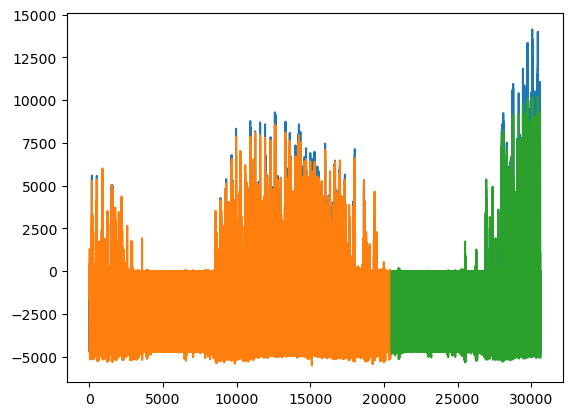

In [170]:
# y mostramos los datos originales, la predicción en training y la predicción en test
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()